In [4]:
from numpy import *
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import curve_fit
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance

### Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

In [5]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([30, 50, 80, 160, 300, 580])

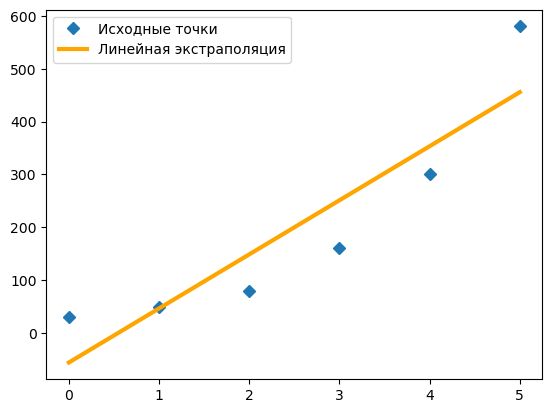

Коэф-ы полинома:  102.286 -55.714
Исходные y: 30 50 80 160 300 580
Полученные y:  -55.714 46.571 148.857 251.143 353.429 455.714
MSE:  6451.42857142857


In [6]:
# y = kx + b; y = ms

m = vstack((x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", metrics.mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  31.071 -53.071 47.857
Исходные y: 30 50 80 160 300 580
Полученные y:  47.857 25.857 66.0 168.286 332.714 559.286
MSE:  444.28571428571377


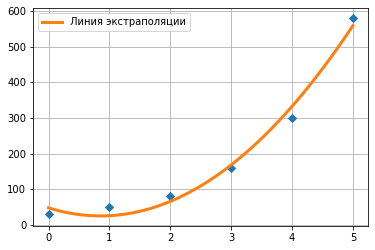

In [93]:
m = vstack((x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^2 + bx + d, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
#mean_squared_error(y, x*)
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", metrics.mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))

Коэф-ы полинома:  6.296 -16.151 33.188 28.968
Исходные y: 30 50 80 160 300 580
Полученные y:  28.968 52.302 81.111 153.175 306.27 578.175
MSE:  16.137566137566047


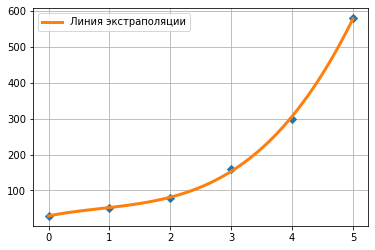

In [94]:
# y = ax^3 + bx^2 + cx + d; y = ms

m = vstack((x**3, x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэф-ы s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]).round(3))
print("MSE: ", metrics.mean_squared_error(y, s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]))

### 1.1.5
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида: 
#### f(x,b) = b_0  + b_1 x 
#### f(x,b) = b_0  + b_1 x + b_2 x^2 
#### f(x,b) = b_0  + b_1 ln(x) 
#### f(x,b) = b_0   x^(b_1 )   


In [21]:
# 1
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.27279523 0.74313483]
0.00014162302120151085
0.12453058810007163


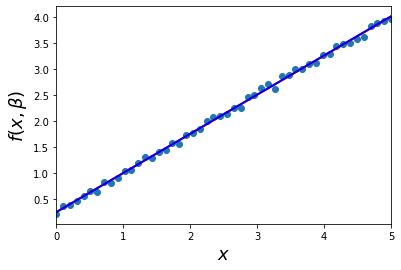

In [20]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [22]:
# 2
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.25992323 0.74516524 0.50108753]
0.00017369218846098242
0.14484110363489147


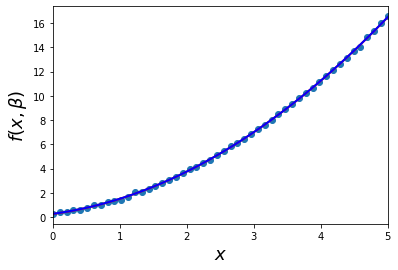

In [23]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [24]:
# 3
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.0298309  1.98400601]
5.482158273550317e-05
0.1267716986627553


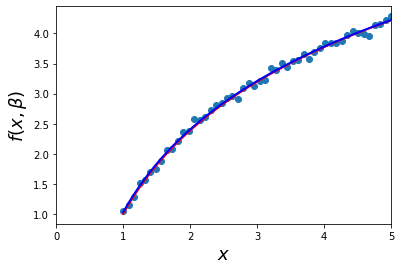

In [25]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [26]:
# 4
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x**b1

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.01127033 2.0001919 ]
7.054025341480811e-05
0.07867518493348141


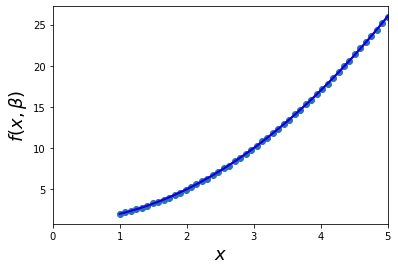

In [27]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.


In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

In [151]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [152]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [155]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = regressor.predict(X_test).reshape(1, -1)
# сравним фактические значения с прогнозируемыми
data = pd.DataFrame({"Actual": y_test,
                   "Predicted":pd.Series(*y_pred)})
data

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [161]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


### Задание
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [231]:
df = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [232]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = LinearRegression().fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-32.003954
Average_income,-0.075188
Paved_Highways,-0.002137
Population_Driver_licence(%),1355.827606


In [237]:
y_pred = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
33,628,621.250921
23,547,463.618291
38,648,727.431022
36,640,646.094665
2,561,585.209891
3,414,486.869741
31,554,587.673738
26,577,597.031210
44,782,702.923921
27,631,617.312283


In [239]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2721.6159571932194


### Задание* 
#### Вариант 7
Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО.


In [114]:
# Исходные данные из 9 варианта
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

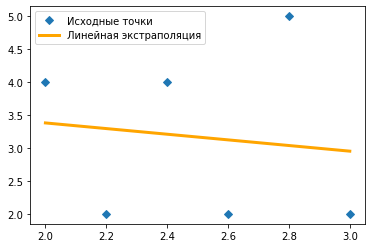

Коэф-ы полинома:  -0.429 4.238
Исходные y: 4.0 2.0 4.0 2.0 5.0 2.0
Полученные y:  3.381 3.295 3.21 3.124 3.038 2.952
MSE:  1.4507936507936507


In [125]:
# Полином первой степени

# y = kx + b = sA, где A = [[x, 1]], s = [k, b]
A = np.vstack([x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", metrics.mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  -0.446 1.804 1.5
Исходные y: 4.0 2.0 4.0 2.0 5.0 2.0
Полученные y:  3.321 3.307 3.257 3.171 3.05 2.893
MSE:  1.4488095238095244


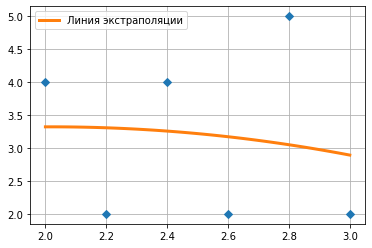

In [140]:
# Полином второй степени

# y = a_2 * x^2 + a_1 * x + a_0 = sA, где A = [[x^2, x, 1]], s = [a, b, c]
A = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

# на отрезке [2, 3]
x_prec = linspace(2, 3, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = a_1 * x^2 + a_2 * x + a_3, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
#mean_squared_error(y, x*)
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", metrics.mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))